# Import some important libaraies :

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

# Remove warnings:

In [76]:
import warnings
warnings.simplefilter("ignore")

# Display all columns and rows in the output :

In [77]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)


# Load our data :

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
train_data=pd.read_csv('/content/drive/My Drive/fashion-mnist_train.csv')
test_data=pd.read_csv('/content/drive/My Drive/fashion-mnist_test.csv')

# Let's have imformation about the dataset:

In [80]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [81]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [82]:
print(f"Shape Of Train Data :{train_data.shape}")
print(f"Shape Of Test Data :{test_data.shape}")

Shape Of Train Data :(60000, 785)
Shape Of Test Data :(10000, 785)


In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [85]:
print(f"maximum value : {np.max(train_data)}\n minimum value : {np.min(train_data)}")

maximum value : 255
 minimum value : 0


In [86]:
# Separate features and labels
train_images = train_data.iloc[:, 1:].values
train_labels = train_data.iloc[:, 0].values

test_images = test_data.iloc[:, 1:].values
test_labels = test_data.iloc[:, 0].values

In [87]:
train_images.shape

(60000, 784)

In [88]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


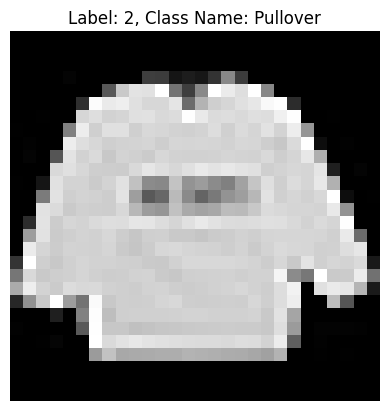

In [89]:

image = train_images[0].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title(f"Label: {train_labels[0]}, Class Name: {class_names[train_labels[0]]}")
plt.axis("off")
plt.show()

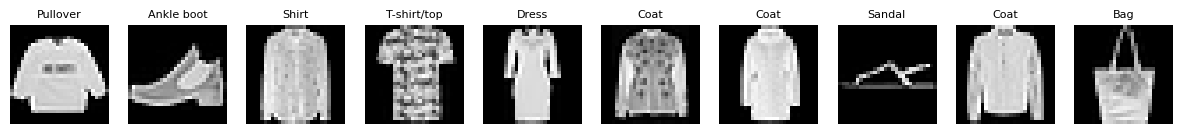

In [90]:

num_images = 10

fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

for i in range(num_images):
    image = train_images[i].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"{class_names[train_labels[i]]}", fontsize=8)
    axes[i].axis('off')
plt.show()

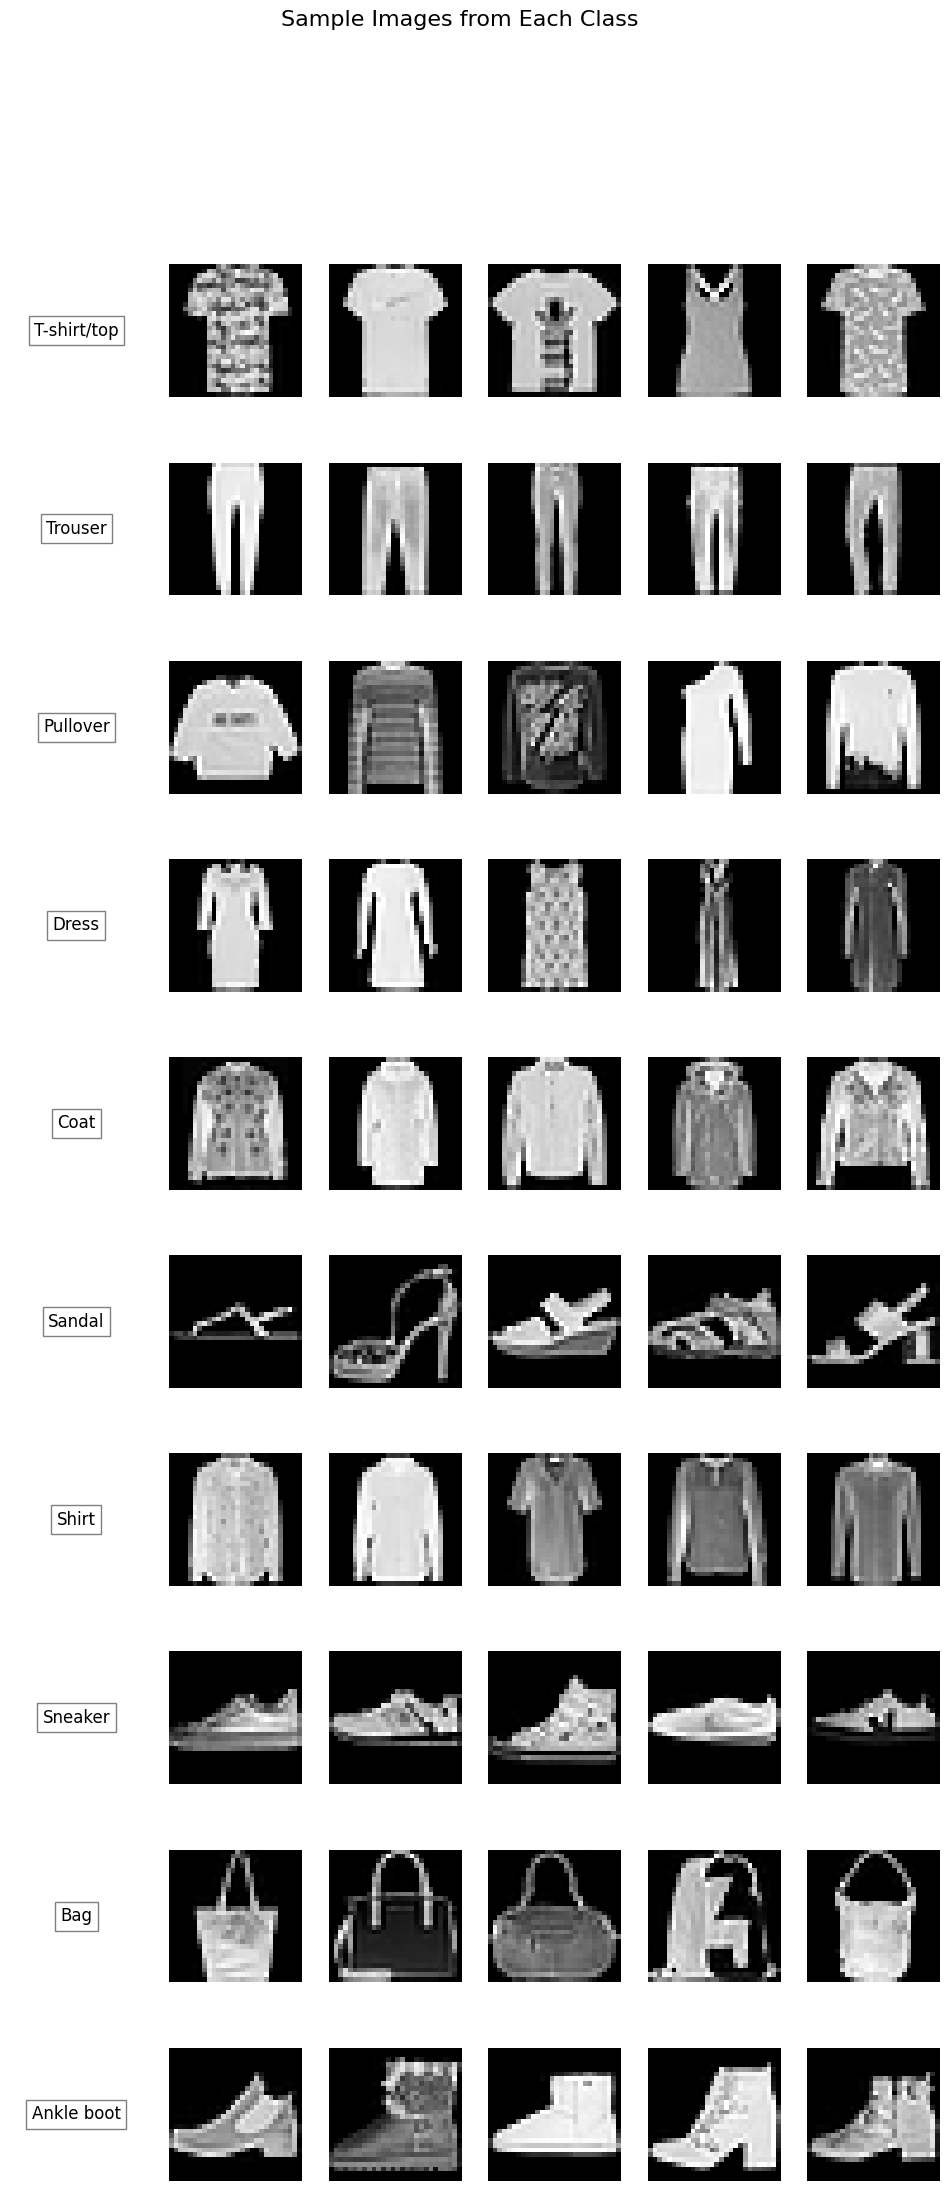

In [91]:

num_classes = len(class_names)
images_per_class = 5

fig, axes = plt.subplots(num_classes, images_per_class + 1, figsize=(12, num_classes * 2.5))

for i, class_name in enumerate(class_names):
    axes[i, 0].text(0.5, 0.5, class_name, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axes[i, 0].axis('off')
    class_indices = [index for index, label in enumerate(train_labels) if label == i]

    for j in range(images_per_class):
        image = train_images[class_indices[j]].reshape(28, 28)
        axes[i, j + 1].imshow(image, cmap='gray')
        axes[i, j + 1].axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.suptitle('Sample Images from Each Class', fontsize=16)
plt.show()




In [92]:
train_labels_named = [class_names[label] for label in train_labels]
class_counts = pd.Series(train_labels_named).value_counts()
class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['Class', 'Count']
class_counts_df

,Class,Count
0,Pullover,6000
1,Ankle boot,6000
2,Shirt,6000
3,T-shirt/top,6000
4,Dress,6000
5,Coat,6000
6,Sandal,6000
7,Bag,6000
8,Sneaker,6000
9,Trouser,6000


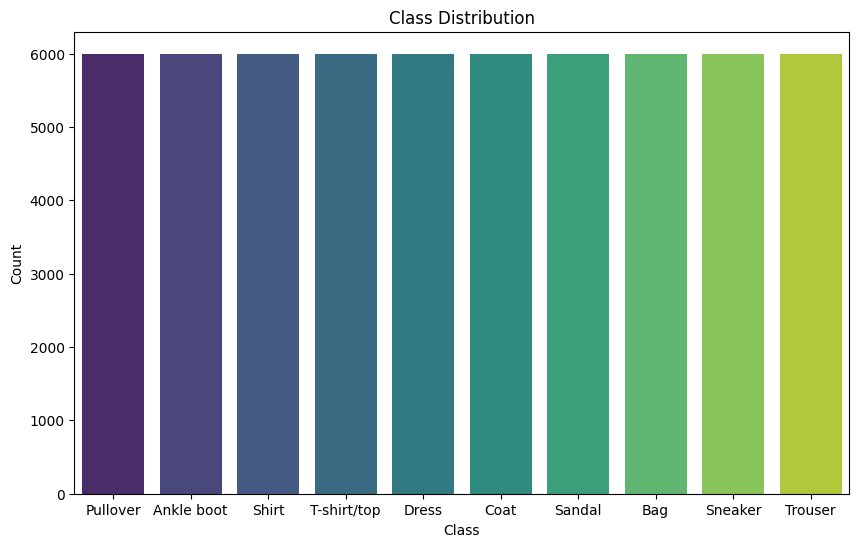

In [93]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_counts_df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

* All classes are balanced

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [95]:
x_test = test_images
y_test = test_labels

# Build Fully Connected Network :

In [96]:



# Build the model
model1 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model1.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [99]:

history = model1.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=30,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7477 - loss: 0.7204 - val_accuracy: 0.8528 - val_loss: 0.4053
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8509 - loss: 0.4086 - val_accuracy: 0.8581 - val_loss: 0.3930
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8715 - loss: 0.3557 - val_accuracy: 0.8698 - val_loss: 0.3720
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8807 - loss: 0.3266 - val_accuracy: 0.8722 - val_loss: 0.3489
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8830 - loss: 0.3150 - val_accuracy: 0.8693 - val_loss: 0.3496
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8936 - loss: 0.2899 - val_accuracy: 0.8803 - val_loss: 0.3219
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8969 - loss: 0.2836 - val_accuracy: 0.8806 - val_loss: 0.3212
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9000 - loss: 0.2721

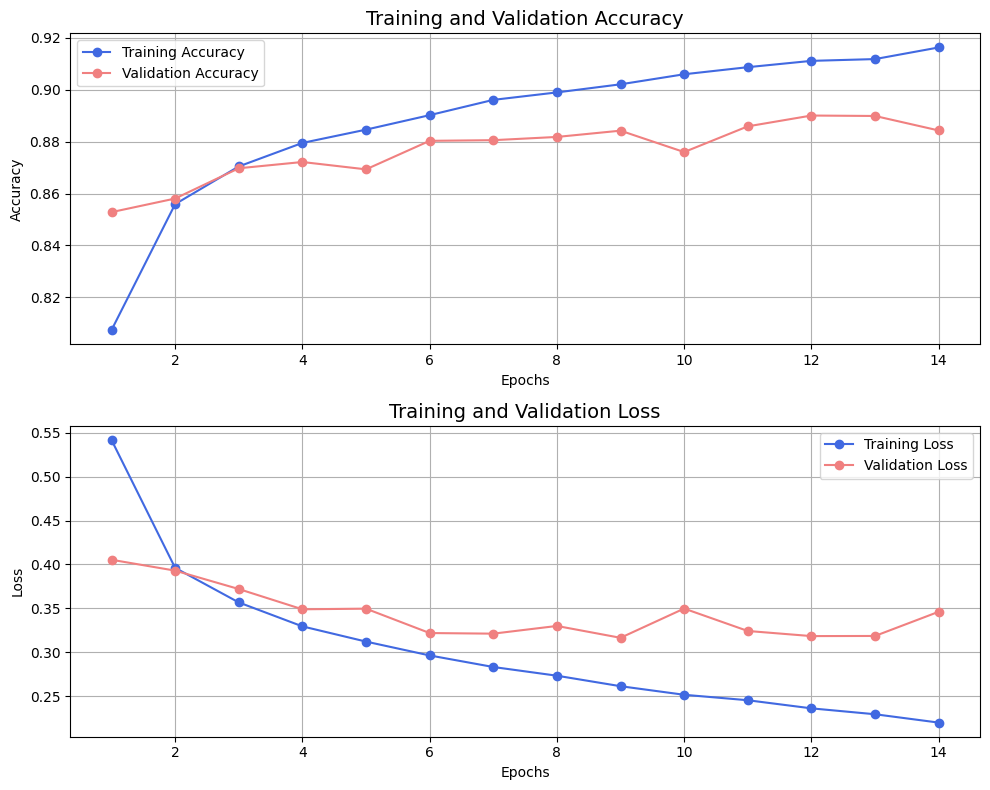

In [100]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    epochs = range(1, len(acc) + 1)


    ax[0].plot(epochs, acc, color='royalblue', linestyle='-', marker='o', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, color='lightcoral', linestyle='-', marker='o', label='Validation Accuracy')
    ax[0].set_title('Training and Validation Accuracy', fontsize=14)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')
    ax[0].grid(True)

    ax[1].plot(epochs, loss, color='royalblue', linestyle='-', marker='o', label='Training Loss')
    ax[1].plot(epochs, val_loss, color='lightcoral', linestyle='-', marker='o', label='Validation Loss')
    ax[1].set_title('Training and Validation Loss', fontsize=14)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_history(history)

In [101]:
# Get predictions for the test set
predictions = model1.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
df_predictions = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': predicted_classes
})

df_predictions.head(10)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,True Label,Predicted Label
0,0,0
1,1,1
2,2,2
3,2,2
4,3,3
5,2,6
6,8,8
7,6,2
8,5,5
9,0,0


# Building CNN Model :

In [102]:
# Reshape images
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_valid_reshaped = x_valid.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)


In [103]:
# Build the CNN model
model2 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [105]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model2.fit(x_train_reshaped, y_train,
                    validation_data=(x_valid_reshaped, y_valid),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 68ms/step - accuracy: 0.6546 - loss: 0.9431 - val_accuracy: 0.8392 - val_loss: 0.4408
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.8180 - loss: 0.4988 - val_accuracy: 0.8680 - val_loss: 0.3568
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - accuracy: 0.8467 - loss: 0.4261 - val_accuracy: 0.8732 - val_loss: 0.3360
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 69ms/step - accuracy: 0.8588 - loss: 0.3889 - val_accuracy: 0.8867 - val_loss: 0.3113
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.8699 - loss: 0.3645 - val_accuracy: 0.8914 - val_loss: 0.2914
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.8749 - loss: 0.3434 - val_accuracy: 0.8942 - val_loss: 0.2867
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.8819 - loss: 0.3277 - val_accuracy: 0.8938 - val_loss: 0.2739
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.8868 - loss: 0.3098 - 

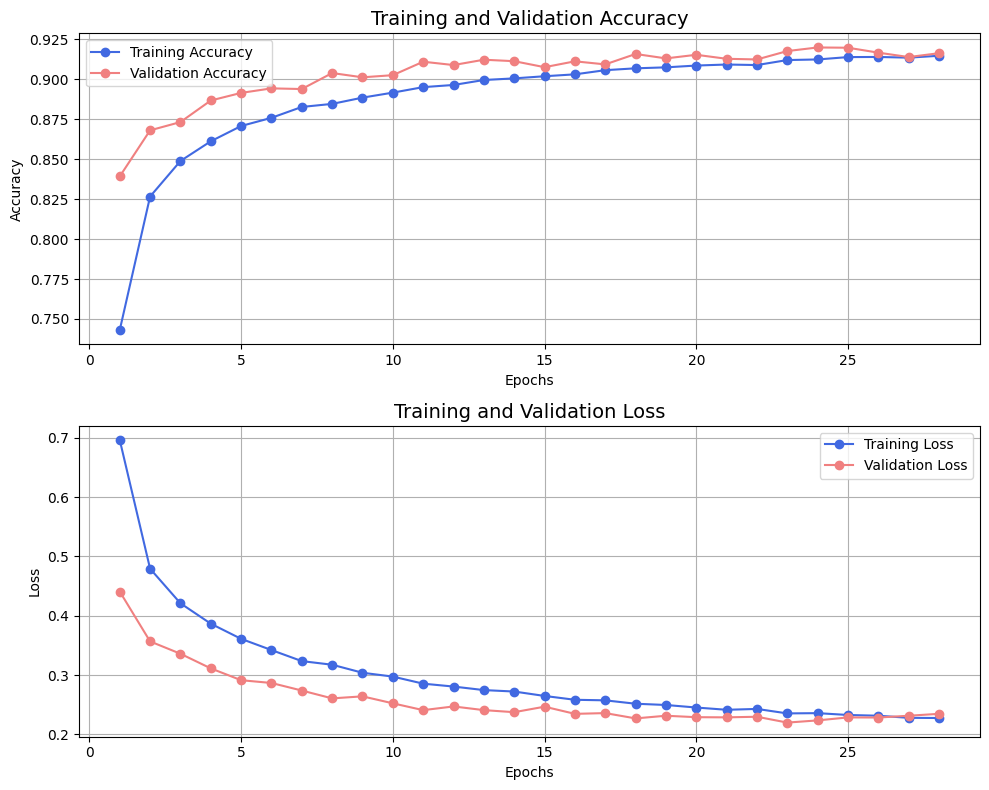

In [106]:


plot_history(history)


In [107]:

predictions = model2.predict(x_test_reshaped)
predicted_classes = predictions.argmax(axis=1)

results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': predicted_classes
})


results_df.head()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


,True Label,Predicted Label
0,0,0
1,1,1
2,2,2
3,2,6
4,3,3


# Evaluation :

In [108]:
test_loss, test_accuracy = model2.evaluate(x_test_reshaped, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9222 - loss: 0.2137
Test Loss: 0.2108
Test Accuracy: 0.9241


In [109]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted_classes, target_names=class_names)
print(report)


              precision    recall  f1-score   support

 T-shirt/top       0.88      0.87      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.85      0.88      1000
       Dress       0.93      0.94      0.93      1000
        Coat       0.88      0.91      0.89      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.76      0.80      0.78      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.95      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



# Look at errors :

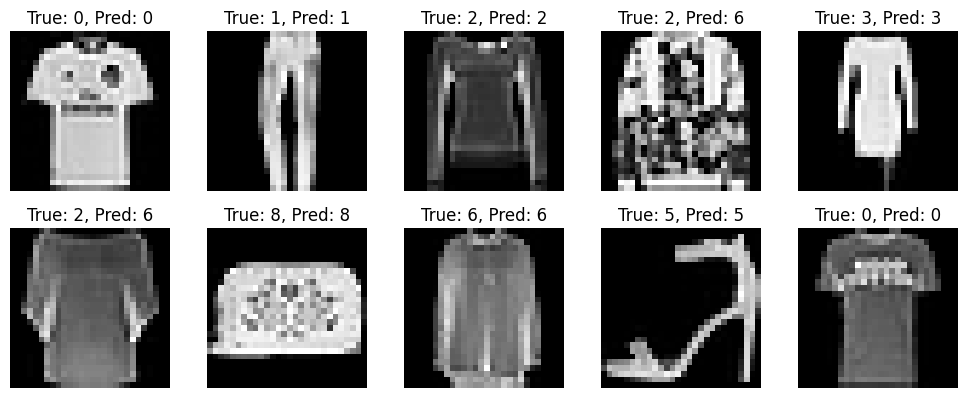

In [110]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]}, Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()